### Step-01:Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px

### Step-02 : Load Data

In [42]:
food=pd.read_csv('food.tsv', sep='\t')
food.head()

c:\Users\Kashif Raza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

In [43]:
# storing the original data in a variable
food_original=food.copy()

### Exploratory Data Analysis
### Step-03: Shape of Data

In [44]:
row, col=food.shape
print('Total number of observations/rows/entries:', row)
print('Total number of columns:', col)

Total number of observations/rows/entries: 356027
Total number of columns: 163


### Step-04: Data Structure

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### Find the missing values

In [62]:
nan_per=food.isnull().sum().sort_values(ascending=False)/food.shape[0]*100

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

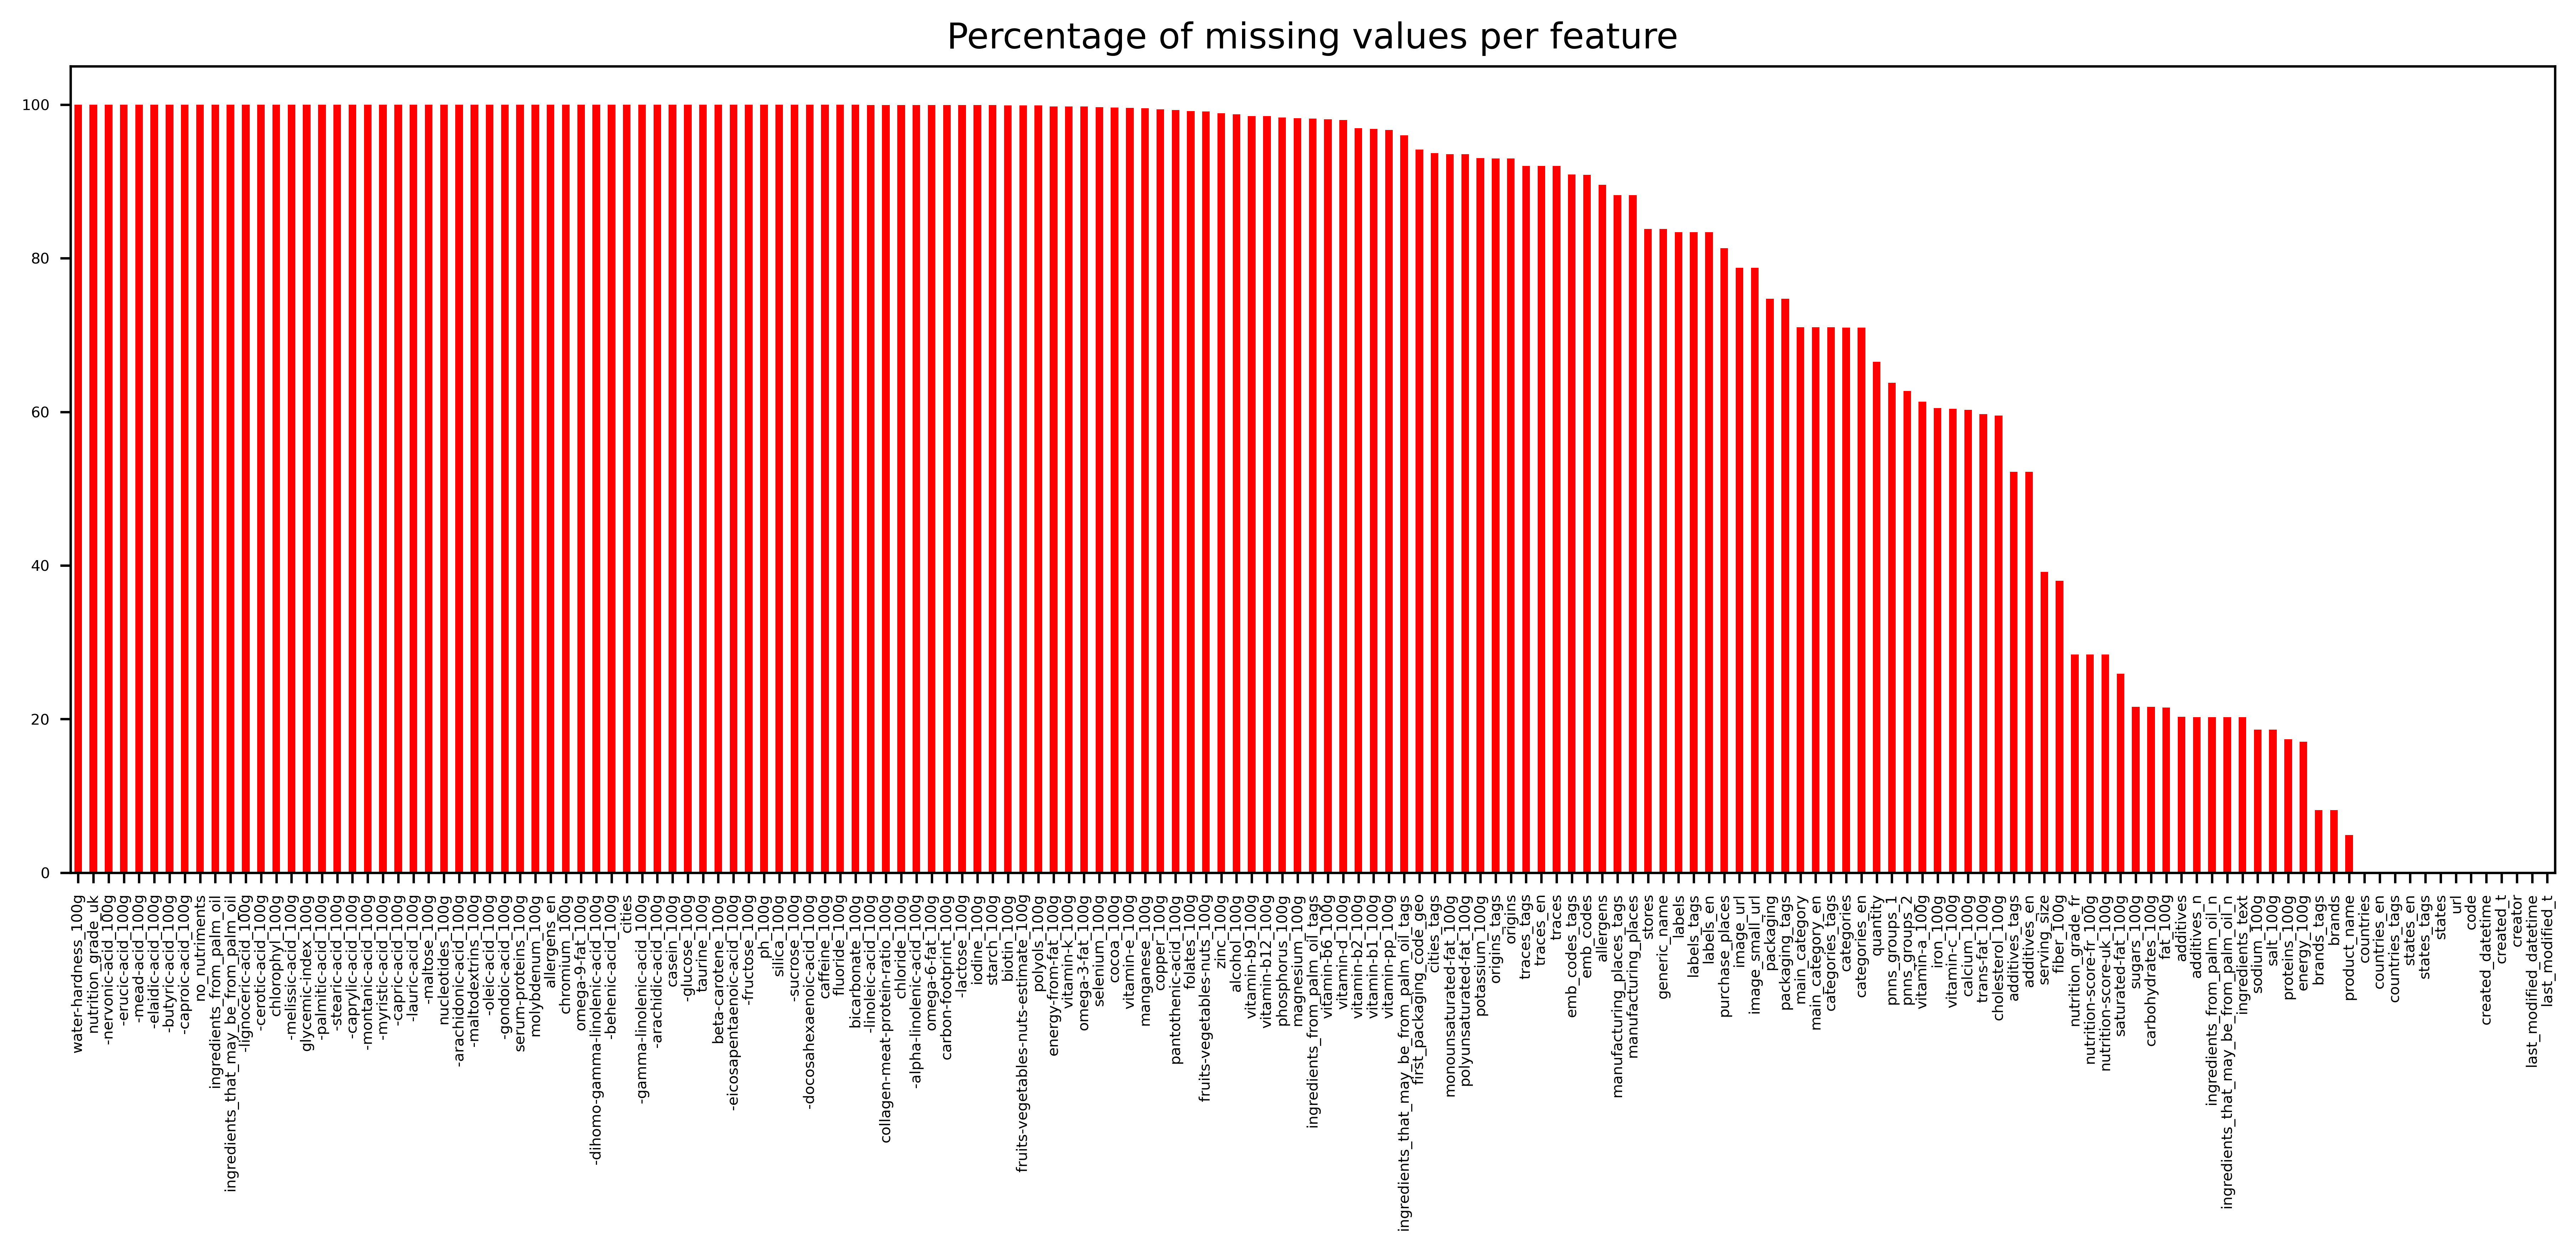

In [57]:
# plotting the percentgae of missing values per feature columns
plt.figure(dpi=600)
nan_per.plot(kind='bar', title='Percentage of missing values per feature', figsize=(15,5),
             color='red', fontsize=5)  

c:\Users\Kashif Raza\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Percentage of nans per feature column')

<Figure size 720x360 with 0 Axes>

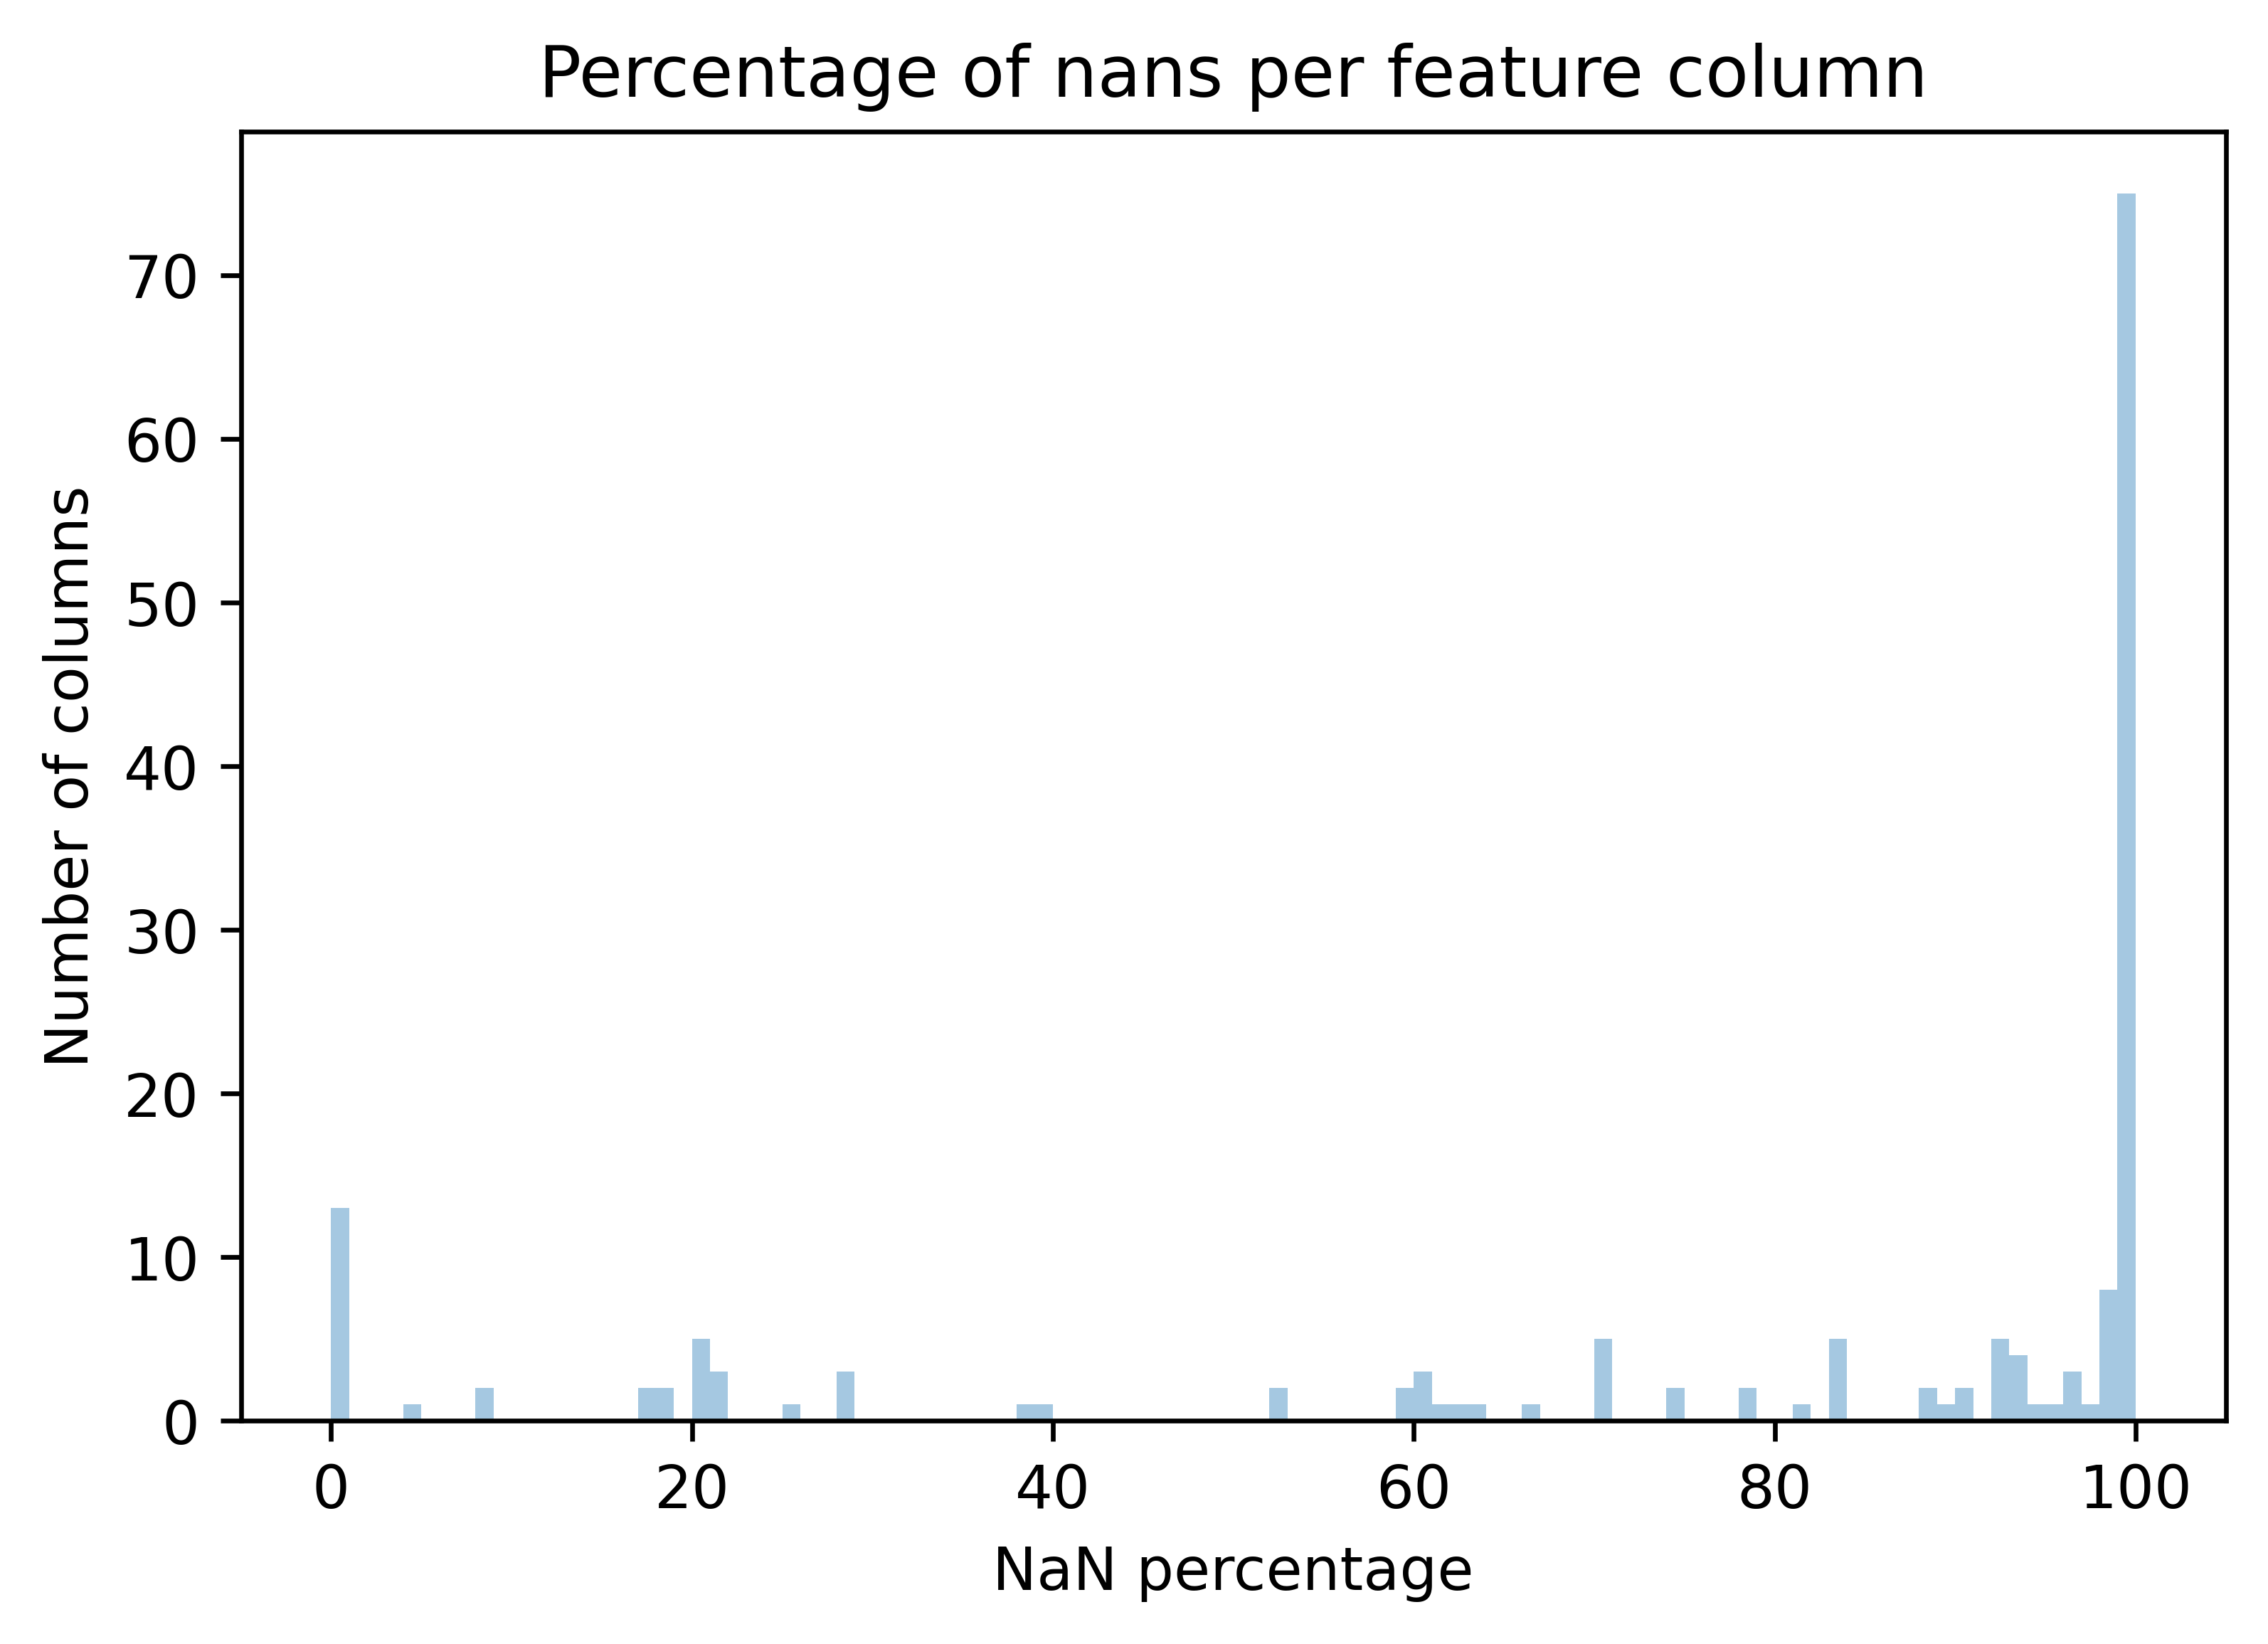

In [58]:
plt.figure(figsize=(10,5))
plt.figure(dpi=600)
sns.distplot(nan_per, bins=100, kde=False)
plt.xlabel("NaN percentage")
plt.ylabel("Number of columns")
plt.title("Percentage of nans per feature column")

### Useless features Columns
- Drop all those feature columns that do not contain any other information than nan. 

In [63]:
useless_features=nan_per[nan_per==100].index
print('Useless features:', useless_features)

Useless features: Index(['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', 'chlorophyl_100g',
       '-melissic-acid_100g', 'glycemic-index_100g'],
      dtype='object')


### Length of useful features
- Find the length of the useful features.

In [65]:
print('Length of useless features:', len(useless_features))

Length of useless features: 16


### Drop useless features
- Drop the useless features.

In [66]:
food.drop(useless_features, axis=1, inplace=True)
print('Shape of the food dataset is:', food.shape)


Shape of the food dataset is: (356027, 147)


### Features with zero NaN values
- Find the features with zero NaN values.

In [67]:
zero_nan_features=nan_per[nan_per==0].index
print('Zero NaN features:', zero_nan_features)

Zero NaN features: Index(['last_modified_datetime', 'last_modified_t'], dtype='object')


### **Splitting the data into NaN groups**
Splitting the data into NaN groups:
1. Columns with low Nan values: (0-20%)
2. Columns with medium NaN values: (20-50%)
3. Columns with High NaN values: (50-100%)

In [70]:
low_nan_features=nan_per[nan_per<=20]
print('Low NaN features:', low_nan_features)
med_nan_features=nan_per[(nan_per>20) & (nan_per<=50)]
print('Medium NaN features:', med_nan_features)
high_nan_features=nan_per[(nan_per>50) & (nan_per<=100)]
print('High NaN features:', high_nan_features)

Low NaN features: sodium_100g              18.631
salt_100g                18.619
proteins_100g            17.377
energy_100g              17.038
brands_tags               8.165
brands                    8.159
product_name              4.919
countries                 0.077
countries_en              0.077
countries_tags            0.077
states_en                 0.015
states_tags               0.015
states                    0.015
url                       0.007
code                      0.007
created_datetime          0.003
created_t                 0.001
creator                   0.001
last_modified_datetime    0.000
last_modified_t           0.000
dtype: float64
Medium NaN features: serving_size                              39.156
fiber_100g                                38.015
nutrition_grade_fr                        28.417
nutrition-score-fr_100g                   28.417
nutrition-score-uk_100g                   28.417
saturated-fat_100g                        25.898
sugars_100g 

In [71]:
print('Length of nan_per features:', len(nan_per))
print('Length of low NaN features:', len(low_nan_features))
print('Length of medium NaN features:', len(med_nan_features))
print('Length of high NaN features:', len(high_nan_features))

Length of nan_per features: 163
Length of low NaN features: 20
Length of medium NaN features: 14
Length of high NaN features: 129


### **Plotting the Nan Groups**
Plotting the low Nan Groups:

Text(0, 0.5, '% of nans ')

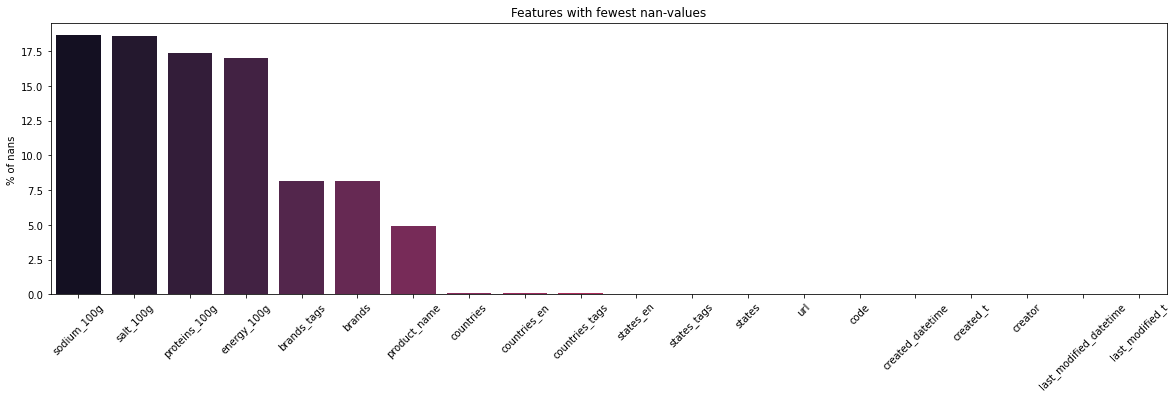

In [89]:
plt.figure(figsize=(20,5))
#plt.figure(dpi=150)
lows = sns.barplot(x=low_nan_features.index.values, y=low_nan_features.values, palette="rocket")
lows.set_xticklabels(low_nan_features.index.values,rotation=45)
plt.title("Features with fewest nan-values")
plt.ylabel("% of nans ")

### Plotting the Medium Nan group features

Text(0, 0.5, '% of nans ')

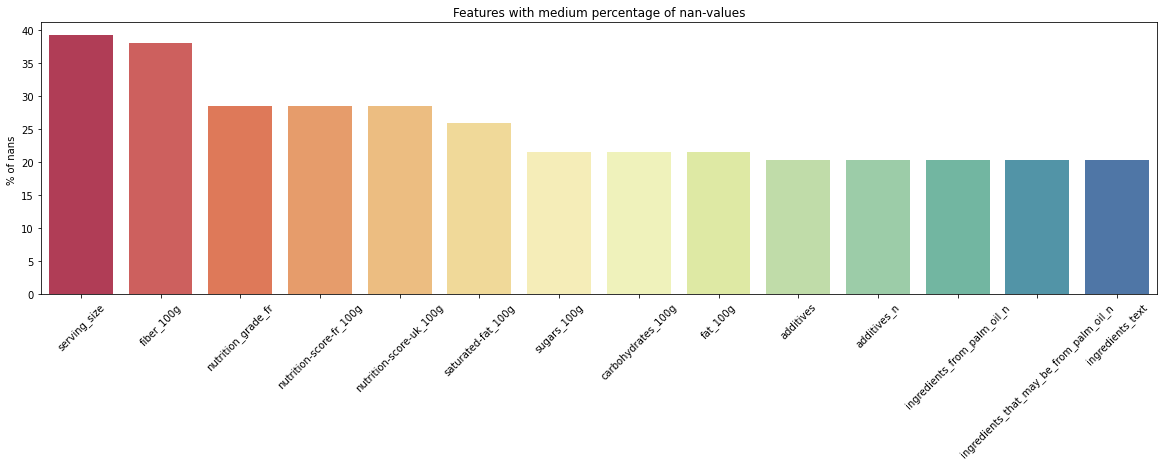

In [92]:
plt.figure(figsize=(20,5))
lows = sns.barplot(x=med_nan_features.index.values, y=med_nan_features.values, palette="Spectral")
lows.set_xticklabels(med_nan_features.index.values,rotation=45)
plt.title("Features with medium percentage of nan-values")
plt.ylabel("% of nans ")

### Plotting the High NaN group features

Text(0, 0.5, '% of nans ')

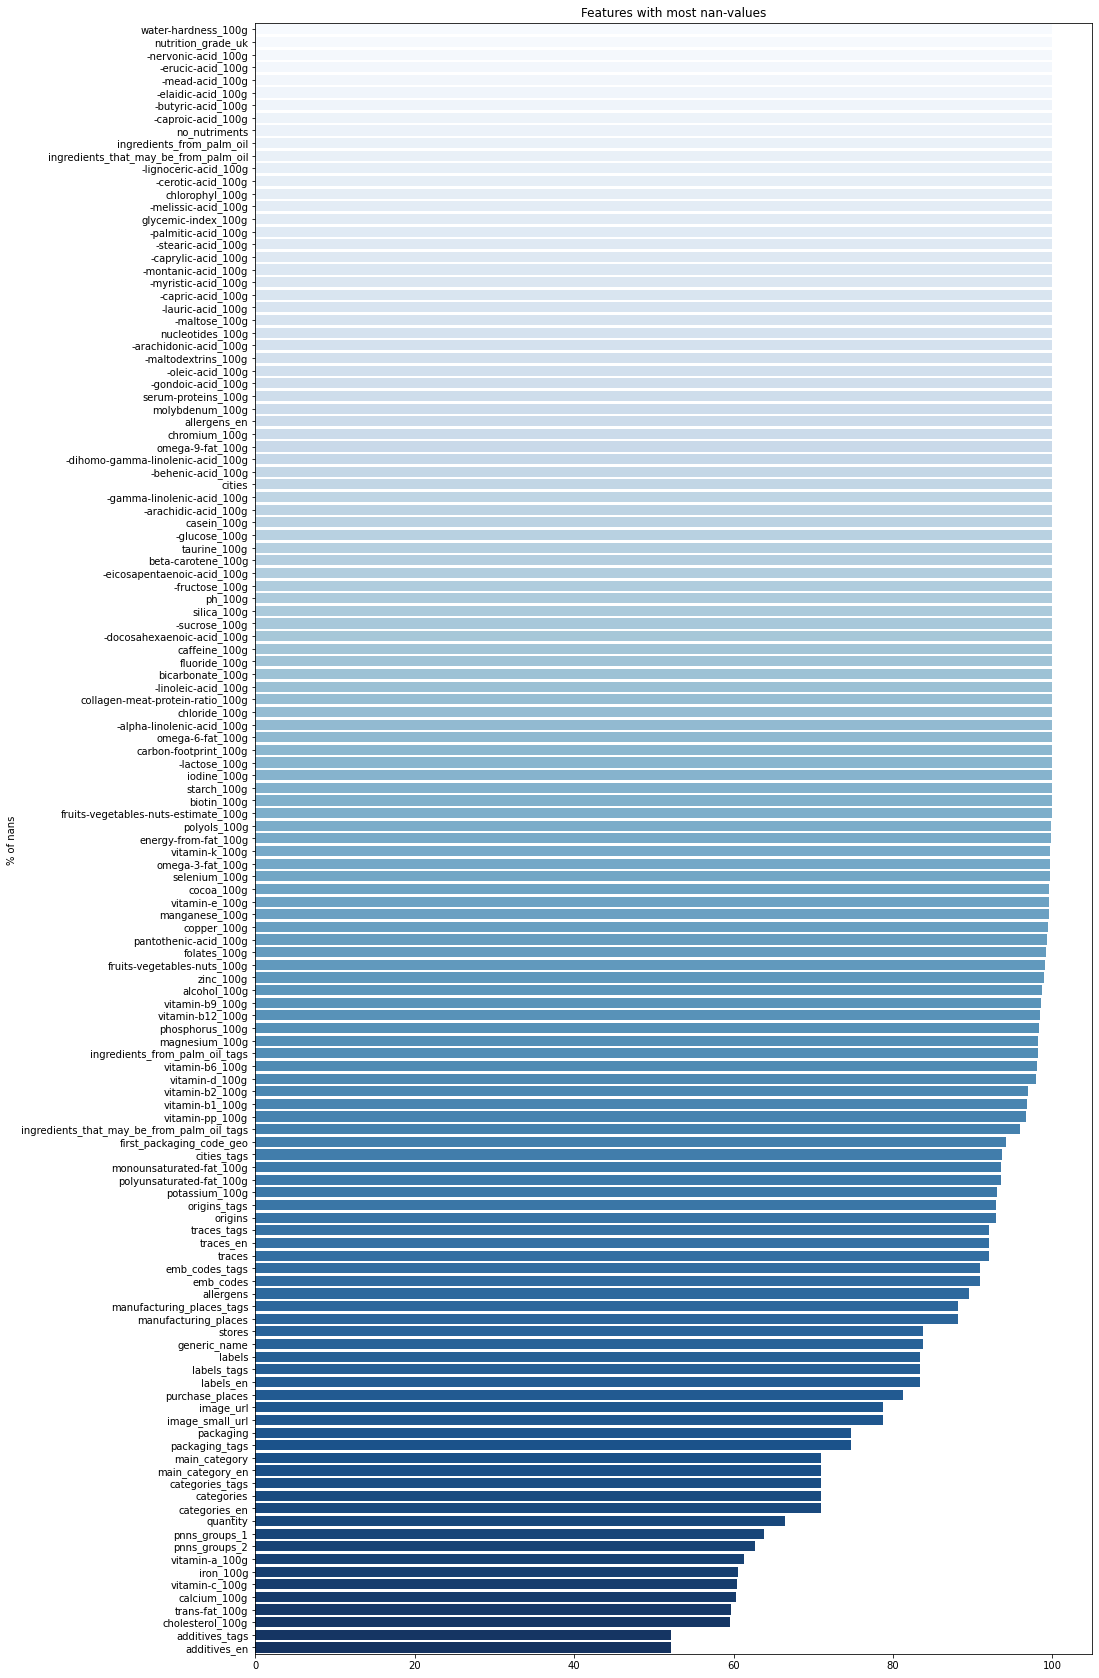

In [96]:
plt.figure(figsize=(15,30))
high = sns.barplot(y=high_nan_features.index.values, x=high_nan_features.values, palette="Blues")
plt.title("Features with most nan-values")
plt.ylabel("% of nans ")

### Drop high NaN data

In [102]:
for i in high_nan_features.index:
    if i in food.columns:
        food.drop(i, axis=1, inplace=True)
# Now printing the shape of the food dataset
print('Shape of the food dataset after dropping columns with High NaN values is:', food.shape)

In [104]:
# make a copy of the food dataset
food_low_nan_data=food.copy()

### Drop the NaN values from the data
- Drop the nan values from the data and then print the shape of data

In [106]:
# dropping nan values from the food dataset
food.dropna(inplace=True)
print('Shape of the food dataset after dropping NaN values is:', food.shape)

Shape of the food dataset after dropping NaN values is: (157157, 34)


### View the data

In [107]:
pd.set_option('display.max_columns', None)
food.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.000,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.000,0.000,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.000,17.860,0.000,60.710,17.860,7.100,17.860,0.635,0.250,0.000,0.000
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.000,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.000,0.000,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.000,57.140,5.360,17.860,3.570,7.100,17.860,1.224,0.482,12.000,12.000


### Data Structure of New Cleaned Data

In [109]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157157 entries, 2 to 356022
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     157157 non-null  object 
 1   url                                      157157 non-null  object 
 2   creator                                  157157 non-null  object 
 3   created_t                                157157 non-null  object 
 4   created_datetime                         157157 non-null  object 
 5   last_modified_t                          157157 non-null  object 
 6   last_modified_datetime                   157157 non-null  object 
 7   product_name                             157157 non-null  object 
 8   brands                                   157157 non-null  object 
 9   brands_tags                              157157 non-null  object 
 10  countries                       

### Step 4: Type casting/Conversion the data type of data
- Some time we need to convert the data type of features to apply the specific operations.

In [112]:
food['serving_size'] = food['serving_size'].astype(str)
food['product_name'] = food['product_name'].astype(str)

### Step5: Summary Statistics of the data
- Summary Statistics of the data:

In [115]:
food.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
additives_n,157157.000,2.017,2.566,0.000,0.000,1.000,3.000,30.000
ingredients_from_palm_oil_n,157157.000,0.015,0.123,0.000,0.000,0.000,0.000,2.000
ingredients_that_may_be_from_palm_oil_n,157157.000,0.047,0.242,0.000,0.000,0.000,0.000,6.000
energy_100g,157157.000,1198.209,753.230,0.000,469.000,1255.000,1760.000,14644.000
fat_100g,157157.000,13.107,15.451,0.000,0.880,7.140,21.430,100.000
saturated-fat_100g,157157.000,4.653,6.854,0.000,0.000,1.760,6.980,100.000
carbohydrates_100g,157157.000,35.097,28.166,0.000,8.770,27.780,60.710,139.000
sugars_100g,157157.000,15.163,19.394,-17.860,1.600,5.600,23.810,145.000
fiber_100g,157157.000,2.860,4.362,0.000,0.000,1.600,3.600,100.000
proteins_100g,157157.000,7.810,7.987,-3.570,2.340,5.710,10.710,100.000


### Step6: Value Counts
- Value Counts of the data:

In [121]:
# Most occurs products are
food.product_name.value_counts().head(10)

Ice Cream            405
Potato Chips         274
Premium Ice Cream    226
Pinto Beans          160
Beef Jerky           155
Cookies              146
Popcorn              144
Cut Green Beans      135
Tomato Sauce         131
Salsa                130
Name: product_name, dtype: int64

In [122]:
# Least occurs products are
food.product_name.value_counts().tail(10)

Qualité & Prix yogi freeze frozen yogurt nature                 1
Gulf Shore Shrimp                                               1
Miso & Shaved Mushrooms                                         1
International Harvest, Power Snack                              1
Fudge Brownie Egg                                               1
Bœuf Bourguignon aux pommes de terre et carottes persillées     1
Palets de soja aux olives vertes et noires                      1
Vienna Sausage, Chicken-Pork                                    1
Gluten Free Rice Spirals                                        1
Starburst Original                                              1
Name: product_name, dtype: int64

### Step:7 Deal with duplicates

In [123]:
# deal with duplicates
food.drop_duplicates(inplace=True)
print('Shape of Dataset after dropping the duplicates', food.shape)

Shape of Dataset after dropping the duplicates (157157, 34)


### Step-8: Check the Normality of Data
- To check the distribution of data whether it is normal or not.

c:\Users\Kashif Raza\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

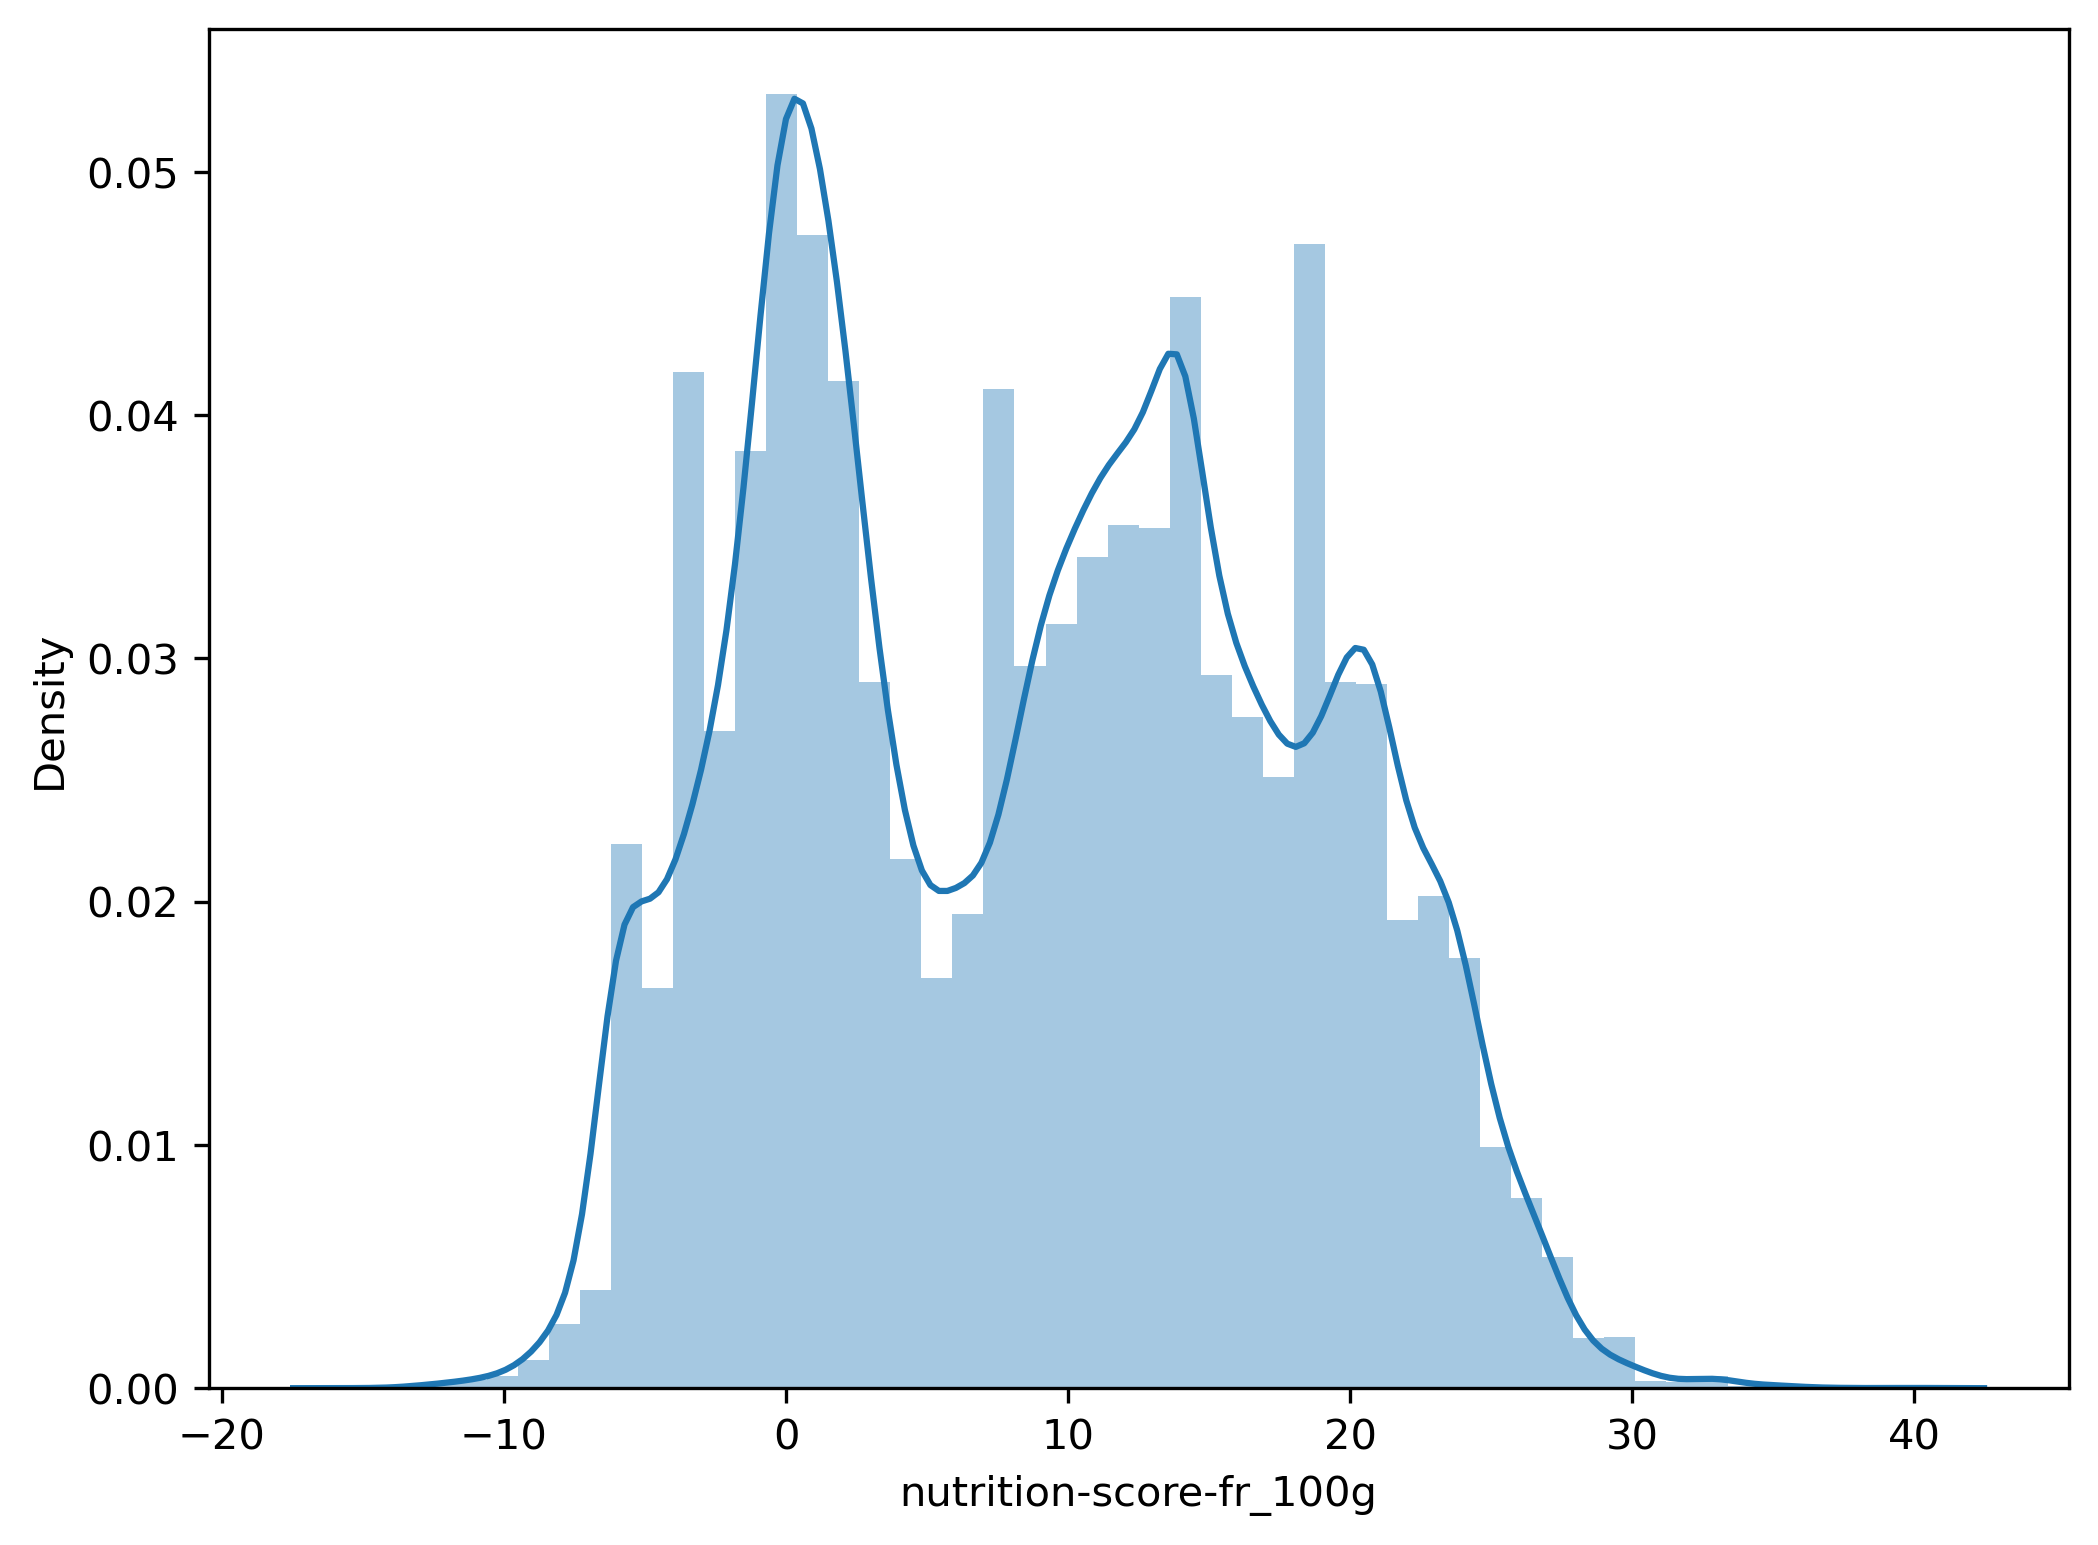

In [127]:
plt.figure(figsize=(8,6), dpi=300)
sns.distplot(food['nutrition-score-fr_100g'])

### Correlation
- Correlation plot tells the relation between the column. Withe the increase or decrease in one quantity how much it affect the 2nd quantity.

<AxesSubplot:>

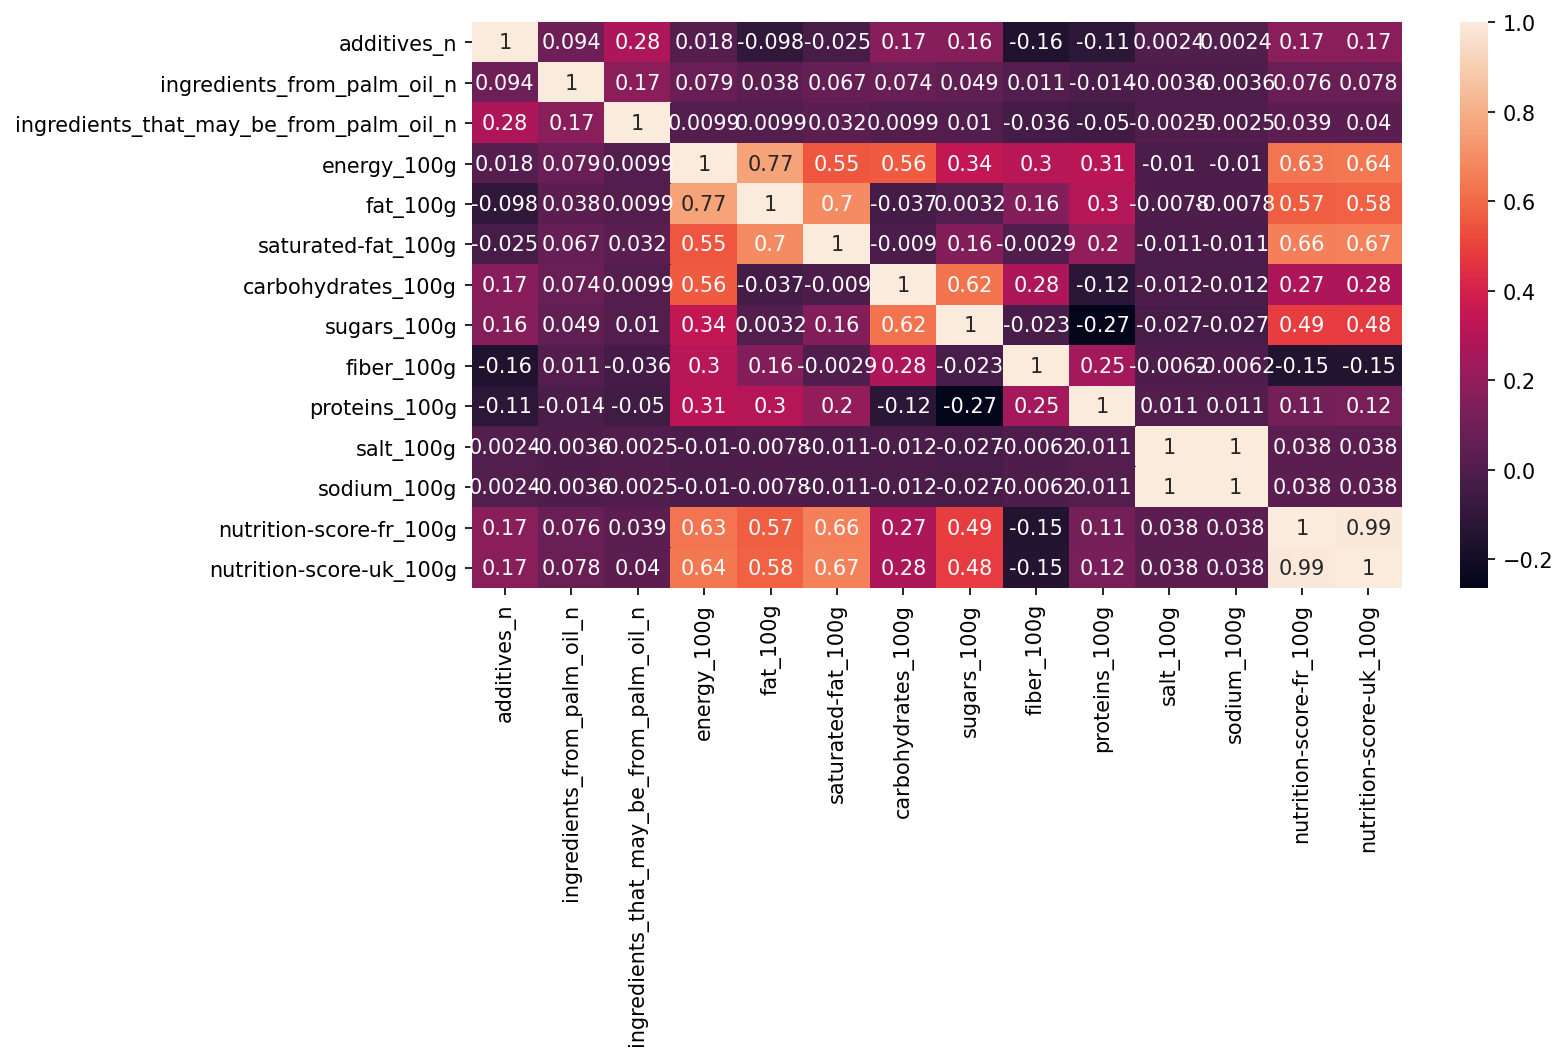

In [130]:
plt.figure(figsize=(10,5), dpi=150)
sns.heatmap(food.corr(), annot=True)